In [2]:
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import RobustScaler


mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

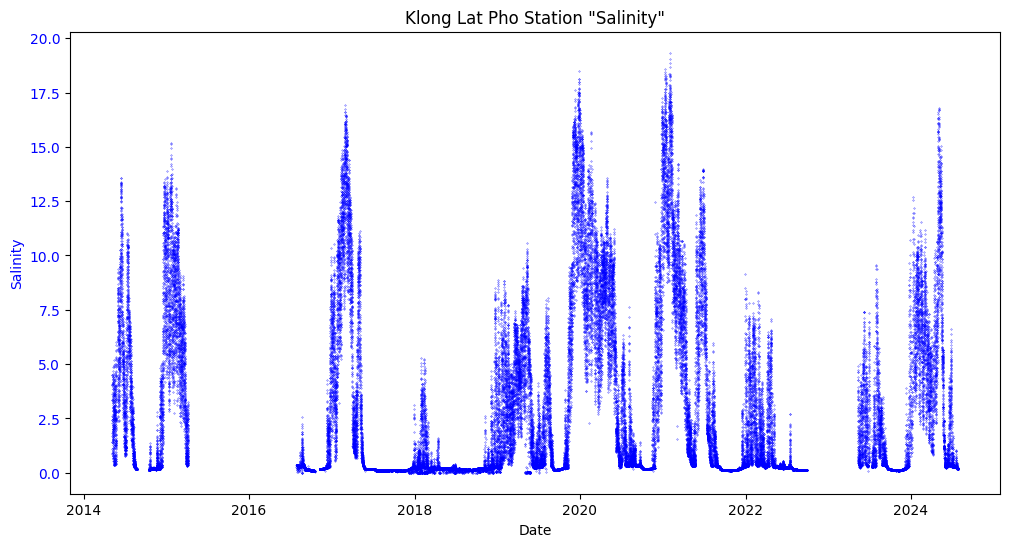

In [4]:
# Load the data
csv_file1 = '/Users/ratchanonkhongsawi/Desktop/CMKL/2nd/FALL/RND1/Data/cleaned_ladpo_v2.csv'
df1 = pd.read_csv(csv_file1)

# Convert date_time to datetime format and set as the index
df1['date_time'] = pd.to_datetime(df1['date_time'], format='%Y-%m-%d %H:%M:%S')
df1.set_index('date_time', inplace=True)

# Filter for columns 'Salinity' and 'Sensor_Depth' and remove rows with NaN values
df1 = df1.loc[:, ['Salinity']]


# Plot both columns
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Salinity data
ax1.plot(df1.index, df1['Salinity'], '.', markersize=0.5, label='Salinity', color='b')
ax1.set_xlabel('Date')
ax1.set_ylabel('Salinity', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Title and show plot
plt.title('Klong Lat Pho Station "Salinity"')
plt.show()

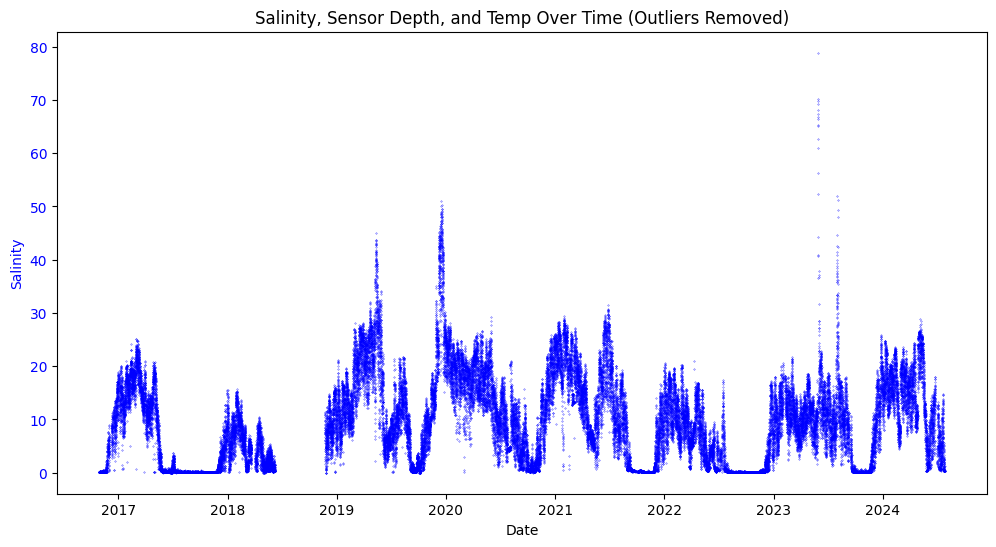

In [9]:
# Load the data
csv_file2 = '/Users/ratchanonkhongsawi/Desktop/CMKL/2nd/FALL/RND1/Data/cleaned_faifa_v2.csv'
df2 = pd.read_csv(csv_file2)

# Convert date_time to datetime format and set as the index
df2['date_time'] = pd.to_datetime(df2['date_time'], format='%Y-%m-%d %H:%M:%S')
df2.set_index('date_time', inplace=True)

# Filter for columns 'Salinity' and 'Sensor_Depth' and remove rows with NaN values
df2 = df2.loc[: , ['Salinity']]

# Remove outliers in Sensor_Depth (e.g., values below -10, assuming they're erroneous)
df2 = df2[(df2['Salinity'] > 0) & (df2['Salinity'] < 50)]

# Plot both columns
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Salinity data
ax1.plot(df2.index, df2['Salinity'], '.', markersize=0.5, label='Salinity', color='b')
ax1.set_xlabel('Date')
ax1.set_ylabel('Salinity', color='b')
ax1.tick_params(axis='y', labelcolor='b')

df = df2.loc['2019-01-01':, ['Salinity']].dropna()
# Title and show plot
plt.title('Salinity, Sensor Depth, and Temp Over Time (Outliers Removed)')
plt.show()

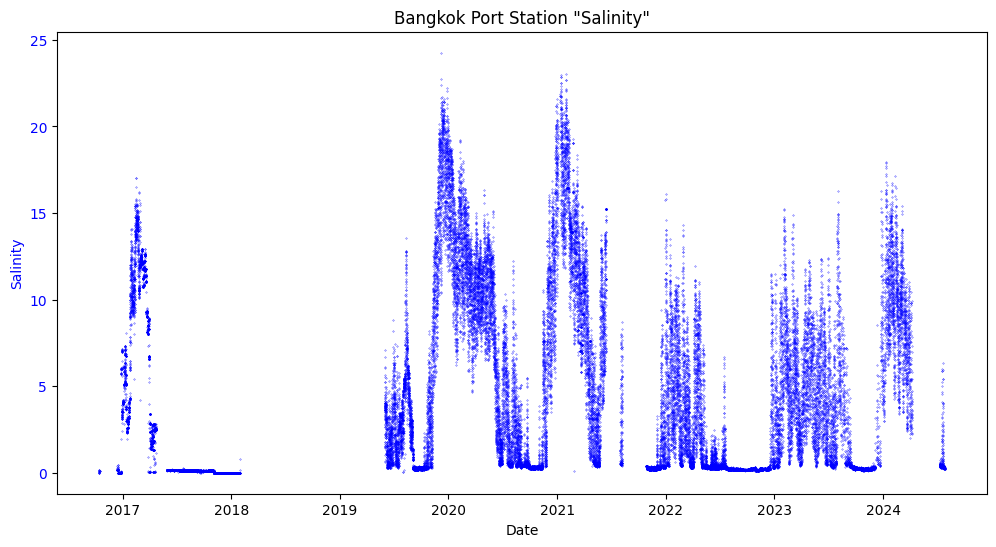

In [5]:
# Load the data
csv_file3 = '/Users/ratchanonkhongsawi/Desktop/CMKL/2nd/FALL/RND1/Data/cleaned_port_v2.csv'
df3 = pd.read_csv(csv_file3)

# Convert date_time to datetime format and set as the index
df3['date_time'] = pd.to_datetime(df3['date_time'], format='%Y-%m-%d %H:%M:%S')
df3.set_index('date_time', inplace=True)

# Filter for columns 'Salinity' and 'Sensor_Depth' and remove rows with NaN values
df3 = df3.loc[:, ['Salinity']]

# Plot both columns
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Salinity data
ax1.plot(df3.index, df3['Salinity'], '.', markersize=0.5, label='Salinity', color='b')
ax1.set_xlabel('Date')
ax1.set_ylabel('Salinity', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Title and show plot
plt.title('Bangkok Port Station "Salinity"')
plt.show()

In [ ]:
# Define column indices dictionary for df1
column_indices = {name: i for i, name in enumerate(df1.columns)}

# Split data into training, validation, and test sets
n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

# Define number of features based on df1's columns
num_features = df.shape[1]

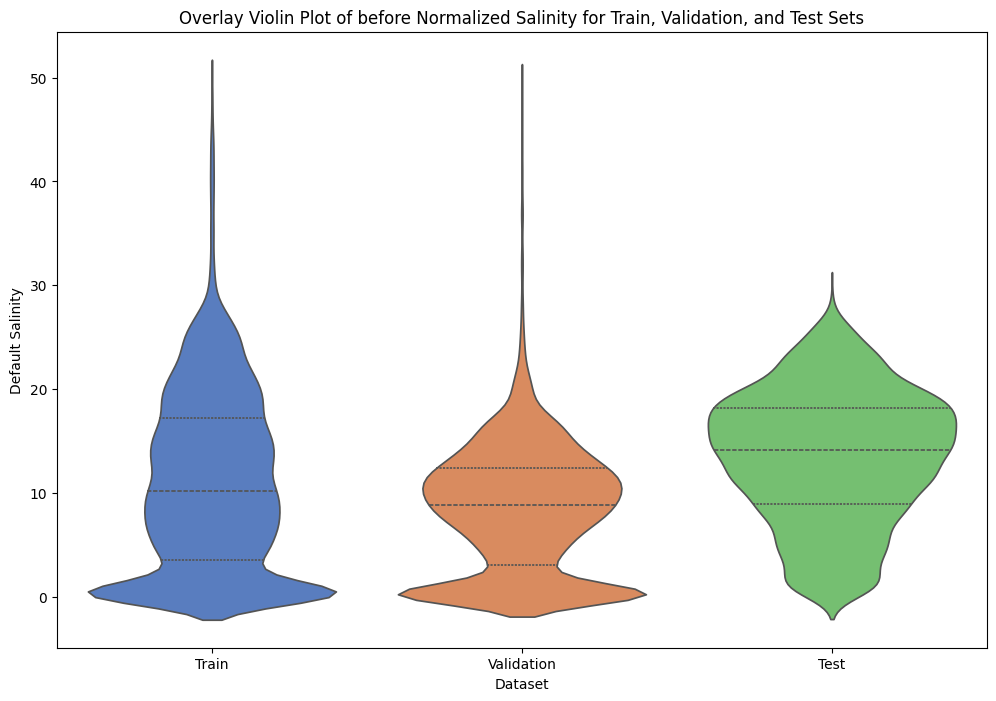

In [ ]:

# train_df, val_df, and test_df before normalized
bf_train_df_graph = pd.DataFrame(train_df, columns=['Salinity'])
bf_val_df_graph = pd.DataFrame(val_df, columns=['Salinity'])
bf_test_df_graph = pd.DataFrame(test_df, columns=['Salinity'])

# Combine the data into a single DataFrame for visualization
bf_train_df_graph['Dataset'] = 'Train'
bf_val_df_graph['Dataset'] = 'Validation'
bf_test_df_graph['Dataset'] = 'Test'

# Stack the data for plotting
combined_bf_df = pd.concat([bf_train_df_graph, bf_val_df_graph, bf_test_df_graph])

# Melt the DataFrame if needed (for multiple features, e.g., salinity column)
# combined_df = combined_df.melt(id_vars=['Dataset'], var_name='Feature', value_name='Value')

# Create the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=combined_bf_df, x='Dataset', y='Salinity', hue='Dataset', inner='quartile', palette='muted', legend=False)

# Add title and labels
plt.title("Overlay Violin Plot of before Normalized Salinity for Train, Validation, and Test Sets")
plt.xlabel("Dataset")
plt.ylabel("Default Salinity")

# Display the plot
plt.show()

In [ ]:
scaler = RobustScaler()
train_df = scaler.fit_transform(train_df)
val_df = scaler.transform(val_df)
test_df = scaler.transform(test_df)

train_df = np.log1p(train_df)
val_df = np.log1p(val_df)
test_df = np.log1p(test_df)

# Calculate the mean and standard deviation of the training data
train_mean = train_df.mean()  # Mean of each column in the training set
train_std = train_df.std()    # Standard deviation of each column in the training set

# Normalize the training set
train_df = (train_df - train_mean) / train_std  # Center data around 0 with unit variance

# Normalize the validation set using the training mean and standard deviation
val_df = (val_df - train_mean) / train_std  

# Normalize the test set using the training mean and standard deviation
test_df = (test_df - train_mean) / train_std

train_df = pd.DataFrame(train_df, columns=['Salinity'])
val_df = pd.DataFrame(val_df, columns=['Salinity'])
test_df = pd.DataFrame(test_df, columns=['Salinity'])

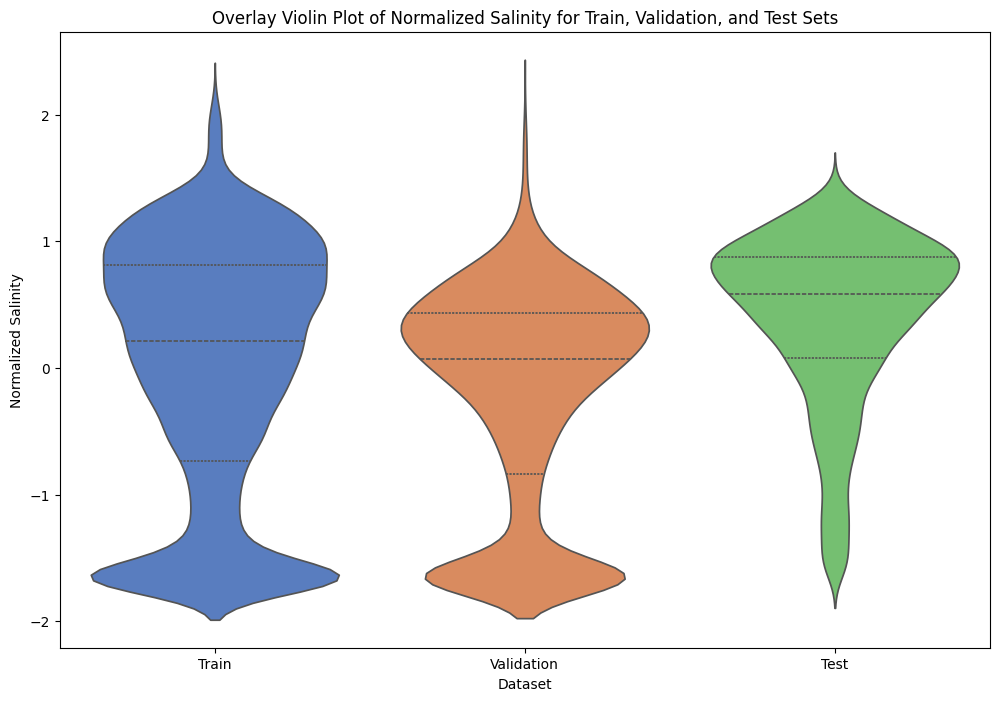

In [ ]:
# Assuming you have your data as Pandas DataFrames
af_train_df_graph = pd.DataFrame(train_df, columns=['Salinity'])
af_val_df_graph = pd.DataFrame(val_df, columns=['Salinity'])
af_test_df_graph = pd.DataFrame(test_df, columns=['Salinity'])
# train_df, val_df, and test_df should already be normalized

# Combine the data into a single DataFrame for visualization
af_train_df_graph['Dataset'] = 'Train'
af_val_df_graph['Dataset'] = 'Validation'
af_test_df_graph['Dataset'] = 'Test'

# Stack the data for plotting
combined_af_df = pd.concat([af_train_df_graph, af_val_df_graph, af_test_df_graph])

# Create the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=combined_af_df, x='Dataset', y='Salinity', hue='Dataset', inner='quartile', palette='muted', legend=False)

# Add title and labels
plt.title("Overlay Violin Plot of Normalized Salinity for Train, Validation, and Test Sets")
plt.xlabel("Dataset")
plt.ylabel("Normalized Salinity")

# Display the plot
plt.show()

In [ ]:
print(type(train_df))  # Should be <class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>


In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [ ]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['Salinity'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['Salinity']

In [ ]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [ ]:
print(type(train_df[:w1.total_window_size]))
print(train_df[:w1.total_window_size].dtypes)

<class 'pandas.core.frame.DataFrame'>
Salinity    float64
dtype: object


In [ ]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w1.total_window_size]),
                           np.array(train_df[100:100+w1.total_window_size]),
                           np.array(train_df[200:200+w1.total_window_size])])

example_inputs, example_labels = w1.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 48, 1)
Inputs shape: (3, 24, 1)
Labels shape: (3, 1, 1)


In [ ]:
w1.example = example_inputs, example_labels

In [ ]:
def plot(self, model=None, plot_col='Salinity', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Date')

WindowGenerator.plot = plot

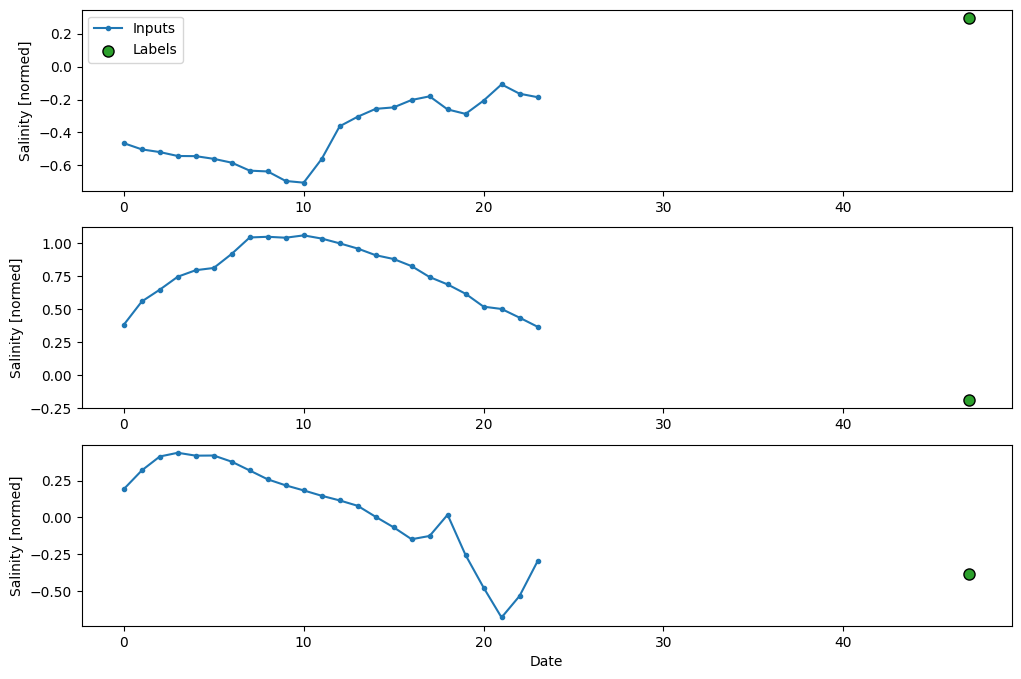

In [ ]:
w1.plot()

In [ ]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=False,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [ ]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

@example.setter
def example(self, value):
    """Set the example batch manually."""
    self._example = value

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [ ]:
# Each element is an (inputs, label) pair.
w1.train.element_spec

(TensorSpec(shape=(None, 24, 1), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [ ]:
for example_inputs, example_labels in w1.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 1)
Labels shape (batch, time, features): (32, 1, 1)


In [ ]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['Salinity'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['Salinity']

In [ ]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 1)
Labels shape (batch, time, features): (32, 1, 1)


In [ ]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [ ]:
baseline = Baseline(label_index=column_indices['Salinity'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val, return_dict=True)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0, return_dict=True)

289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - loss: 0.0159 - mean_absolute_error: 0.0802


In [ ]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['Salinity'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['Salinity']

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 1)
Output shape: (32, 24, 1)


In [ ]:
# Stack three slices, each of length equal to the total window size
example_wide_window = tf.stack([
    np.array(train_df[:wide_window.total_window_size]),
    np.array(train_df[100:100 + wide_window.total_window_size]),
    np.array(train_df[200:200 + wide_window.total_window_size])
])

# Split the stacked slices into inputs and labels
wide_example_inputs, wide_example_labels = wide_window.split_window(example_wide_window)

# Print shapes for verification
print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_wide_window.shape}')
print(f'Inputs shape: {wide_example_inputs.shape}')
print(f'Labels shape: {wide_example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 25, 1)
Inputs shape: (3, 24, 1)
Labels shape: (3, 24, 1)


In [ ]:
wide_window.example = (wide_example_inputs, wide_example_labels)

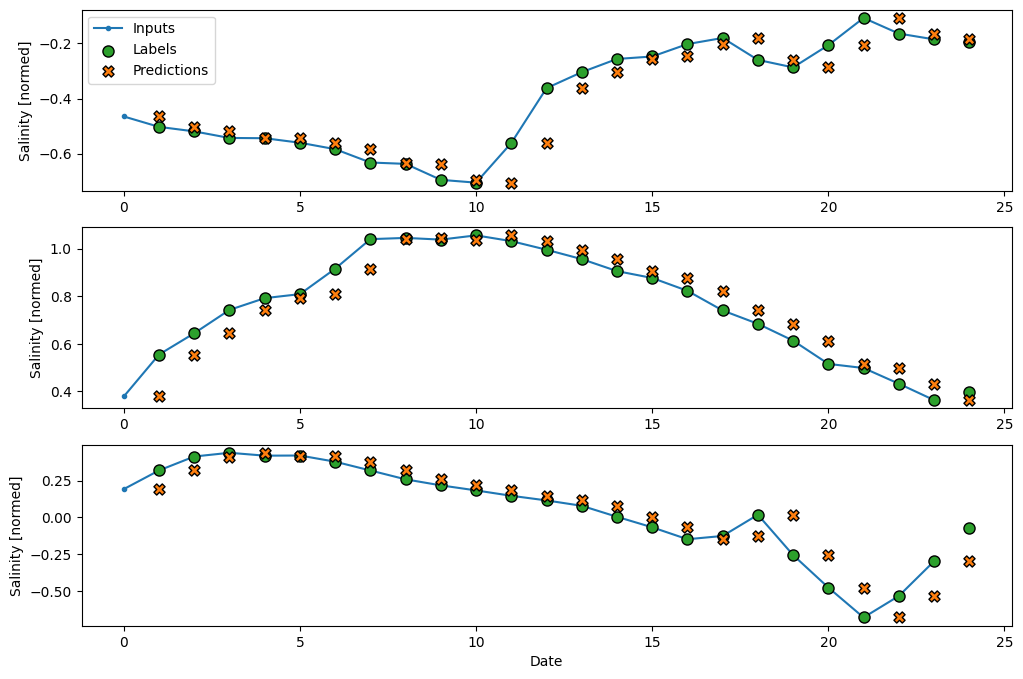

In [ ]:
wide_window.plot(baseline)

In [ ]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [ ]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 1)
Output shape: (32, 1, 1)


In [ ]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [ ]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val, return_dict=True)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0, return_dict=True)

Epoch 1/20
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2326 - mean_absolute_error: 0.3956 - val_loss: 0.0274 - val_mean_absolute_error: 0.1335
Epoch 2/20
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 1s 884us/step - loss: 0.0218 - mean_absolute_error: 0.1095 - val_loss: 0.0170 - val_mean_absolute_error: 0.0822
Epoch 3/20
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 1s 854us/step - loss: 0.0151 - mean_absolute_error: 0.0755 - val_loss: 0.0170 - val_mean_absolute_error: 0.0817
Epoch 4/20
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - loss: 0.0150 - mean_absolute_error: 0.0753 - val_loss: 0.0170 - val_mean_absolute_error: 0.0816
Epoch 5/20
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step - loss: 0.0150 - mean_absolute_error: 0.0753 - val_loss: 0.0171 - val_mean_absolute_error: 0.0817
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - loss: 0.0160 - mean_absolute_error: 0.0791


In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', linear(wide_window.example[0]).shape)

Input shape: (3, 24, 1)
Output shape: (3, 24, 1)


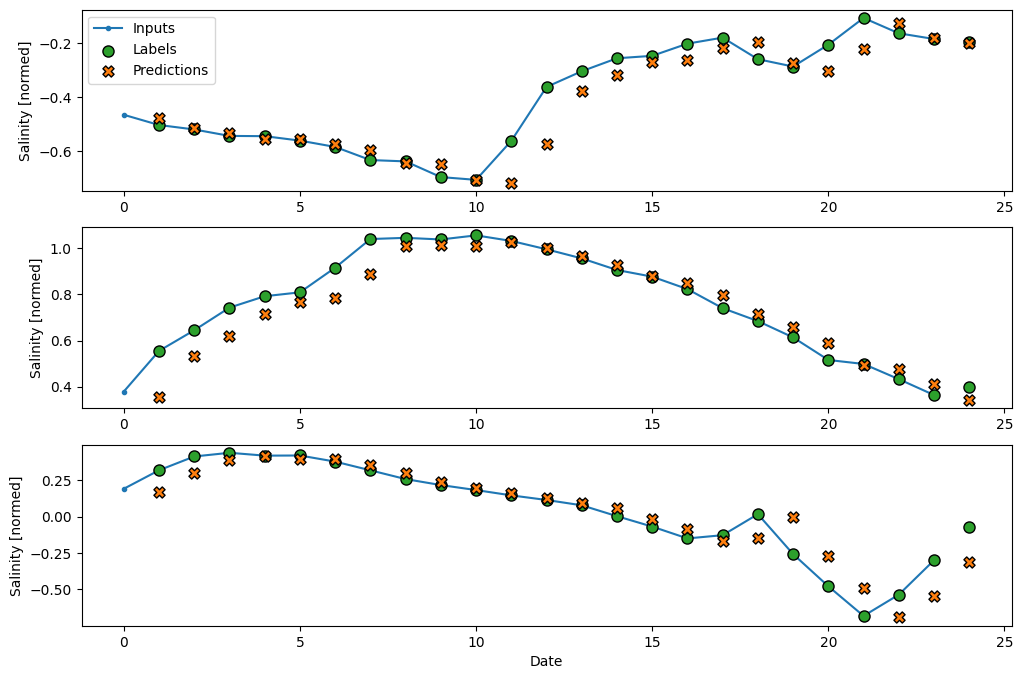

In [ ]:
wide_window.plot(linear)

In [ ]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val, return_dict=True)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0, return_dict=True)

Epoch 1/20
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 1s 943us/step - loss: 0.0243 - mean_absolute_error: 0.0987 - val_loss: 0.0178 - val_mean_absolute_error: 0.0826
Epoch 2/20
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 1s 820us/step - loss: 0.0155 - mean_absolute_error: 0.0793 - val_loss: 0.0178 - val_mean_absolute_error: 0.0829
Epoch 3/20
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 1s 901us/step - loss: 0.0155 - mean_absolute_error: 0.0791 - val_loss: 0.0178 - val_mean_absolute_error: 0.0828
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 0.0166 - mean_absolute_error: 0.0799


In [ ]:
CONV_WIDTH = 24
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['Salinity'])

conv_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24]
Label column name(s): ['Salinity']

Text(0.5, 0.98, 'Given 24 hours of inputs, predict 1 hour into the future.')

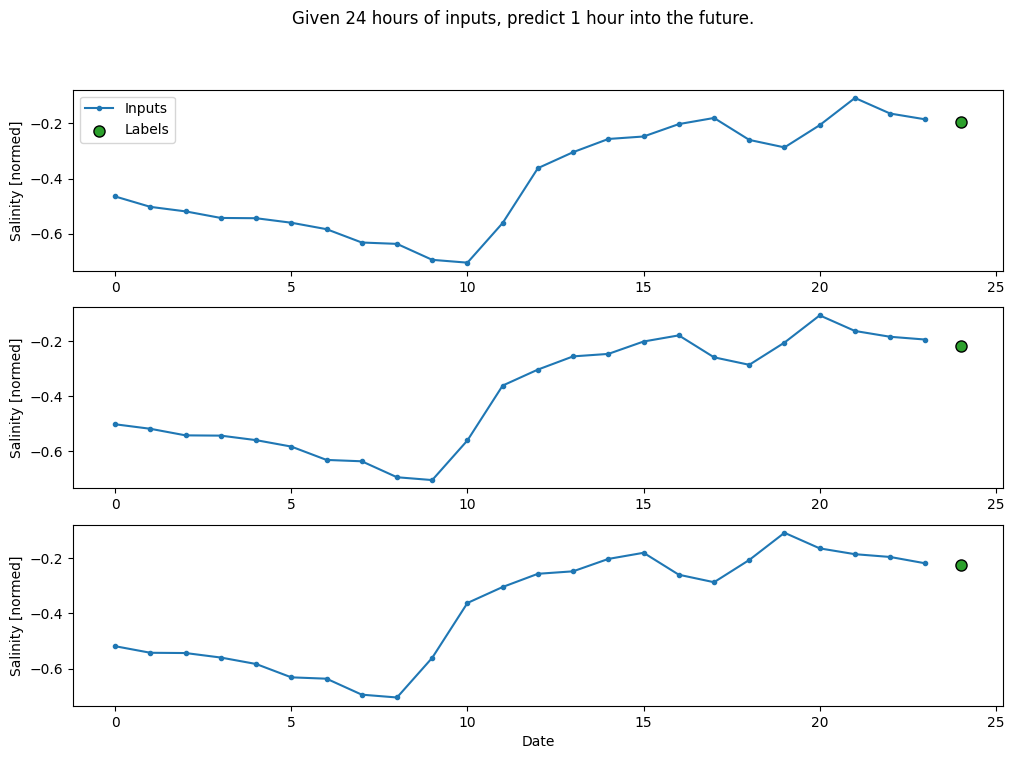

In [ ]:
conv_window.plot()
plt.suptitle("Given 24 hours of inputs, predict 1 hour into the future.")

In [ ]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [ ]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 24, 1)
Output shape: (32, 1, 1)


In [ ]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val, return_dict=True)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0, return_dict=True)

288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - loss: 0.0222 - mean_absolute_error: 0.1027


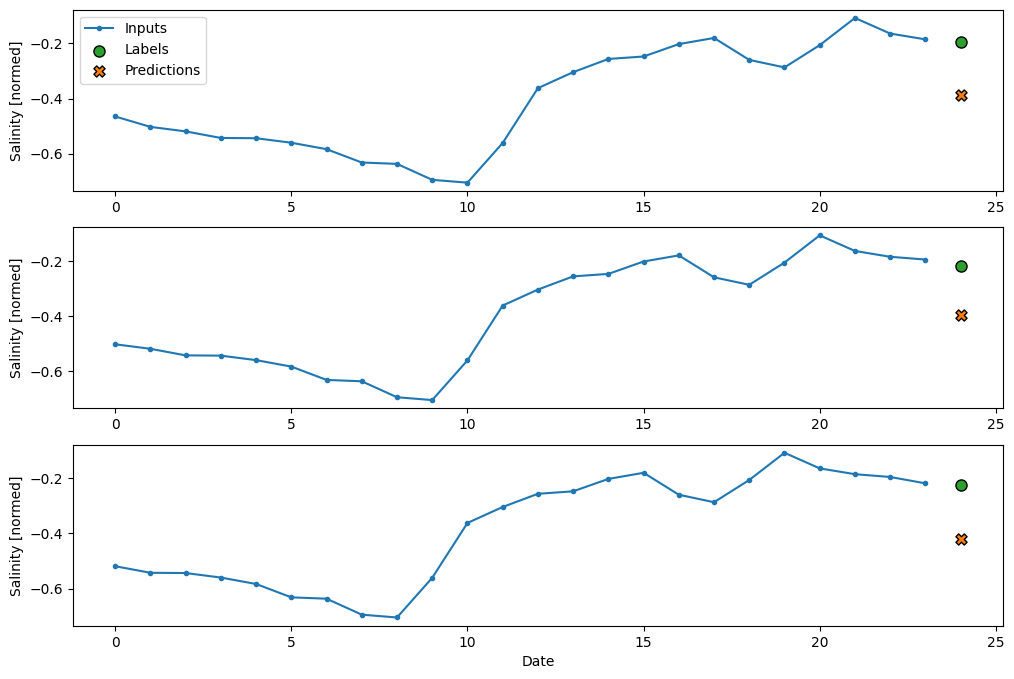

In [ ]:
conv_window.plot(multi_step_dense)

In [ ]:
print('Input shape:', wide_window.example[0].shape)
try:
  print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
  print(f'\n{type(e).__name__}:{e}')

Input shape: (3, 24, 1)
Output shape: (3, 1, 1)


In [ ]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [ ]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 24, 1)
Output shape: (32, 1, 1)


In [ ]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val, return_dict=True)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0, return_dict=True)

288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0215 - mean_absolute_error: 0.0994


In [ ]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (3, 24, 1)
Labels shape: (3, 24, 1)
Output shape: (3, 1, 1)


In [ ]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['Salinity'])

wide_conv_window

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): ['Salinity']

In [ ]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 47, 1)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


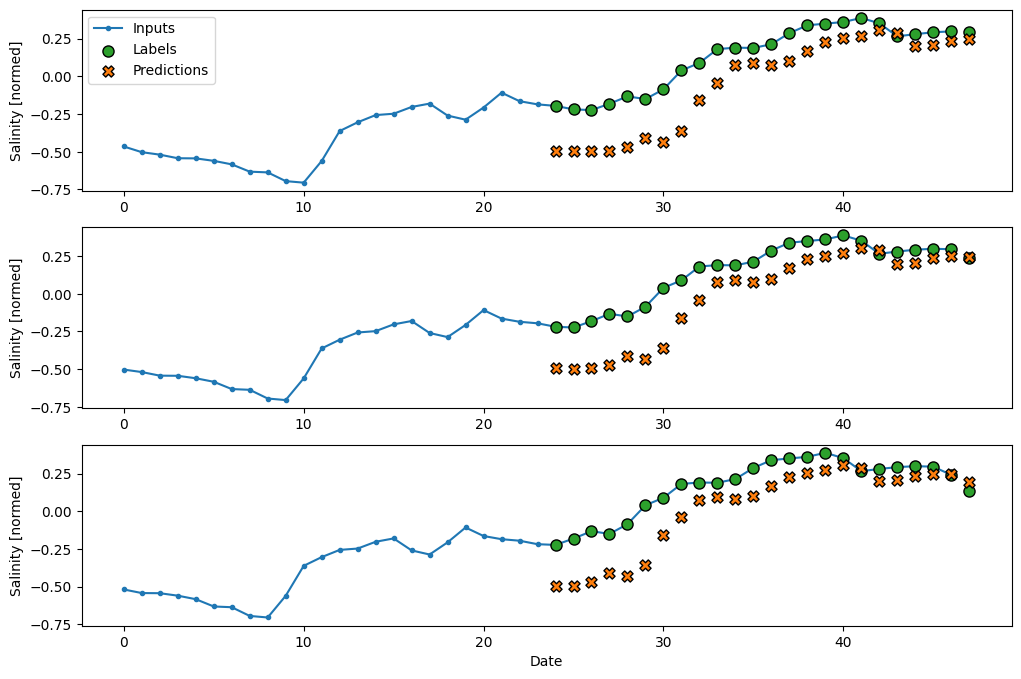

In [ ]:
wide_conv_window.plot(conv_model)

In [ ]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (3, 24, 1)
Output shape: (3, 24, 1)


In [ ]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['Single_LSTM'] = lstm_model.evaluate(wide_window.val, return_dict=True)
performance['Single_LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0, return_dict=True)

288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0150 - mean_absolute_error: 0.0740


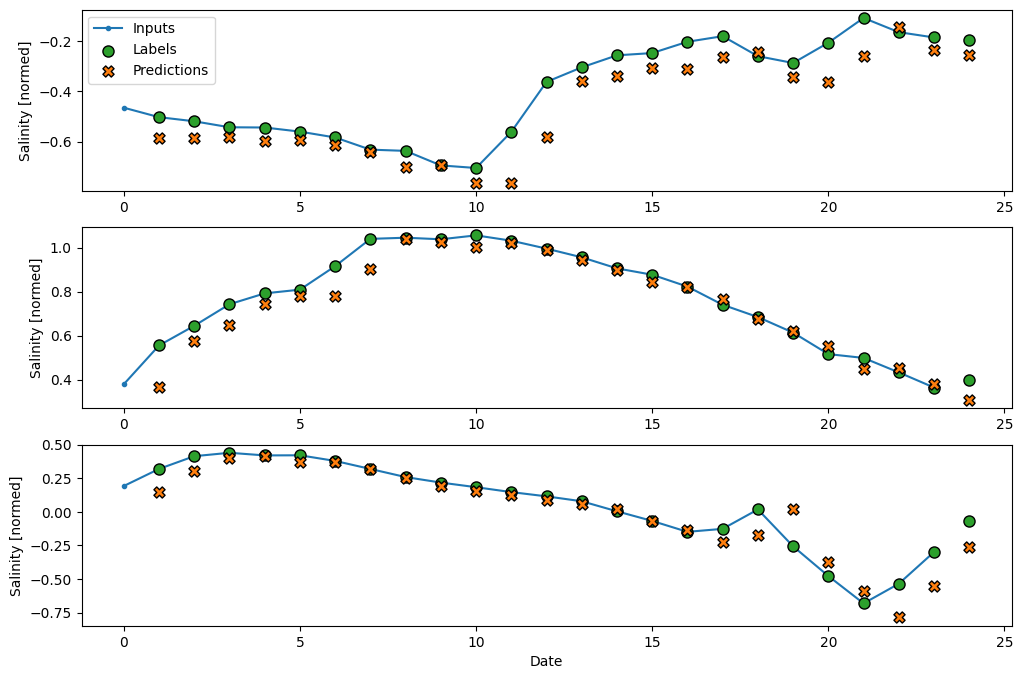

In [ ]:
wide_window.plot(lstm_model)

In [ ]:
cm = lstm_model.metrics[1]
cm.metrics

[<MeanAbsoluteError name=mean_absolute_error>]

In [ ]:
val_performance

{'Baseline': {'loss': 0.016975704580545425,
  'mean_absolute_error': 0.08244752138853073},
 'Linear': {'loss': 0.017134755849838257,
  'mean_absolute_error': 0.08165653049945831},
 'Dense': {'loss': 0.01781180314719677,
  'mean_absolute_error': 0.08284861594438553},
 'Multi step dense': {'loss': 0.02199857495725155,
  'mean_absolute_error': 0.1028081402182579},
 'Conv': {'loss': 0.021323278546333313,
  'mean_absolute_error': 0.09994736313819885},
 'Single_LSTM': {'loss': 0.015914304181933403,
  'mean_absolute_error': 0.07719612121582031}}

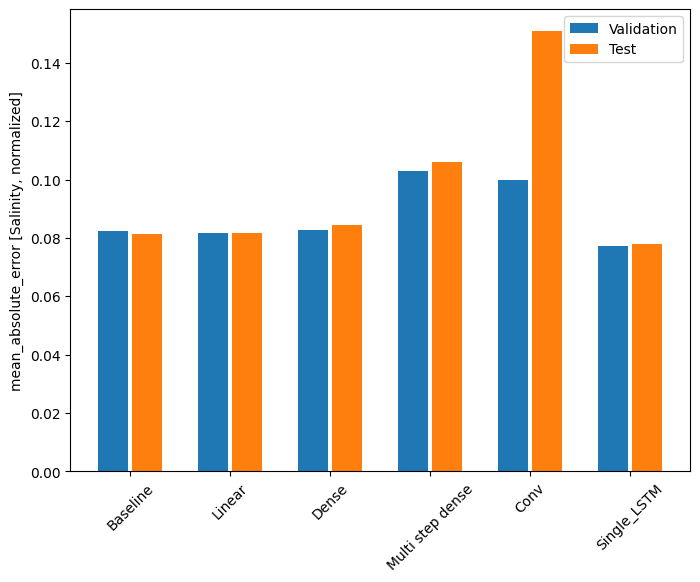

In [ ]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
val_mae = [v[metric_name] for v in val_performance.values()]
test_mae = [v[metric_name] for v in performance.values()]

plt.ylabel('mean_absolute_error [Salinity, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [ ]:
for name, value in performance.items():
  print(f'{name:12s}: {value[metric_name]:0.4f}')

Baseline    : 0.0812
Linear      : 0.0816
Dense       : 0.0844
Multi step dense: 0.1060
Conv        : 0.1508
Single_LSTM : 0.0778
